<a href="https://colab.research.google.com/github/Priyabrat845/Linear-Regression-/blob/main/Copy_of_Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Rough works/car data.csv')


## **Data Inspection**

In [12]:
# First look
dataset['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
dataset.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [16]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## **Exploratory Data Analysis**

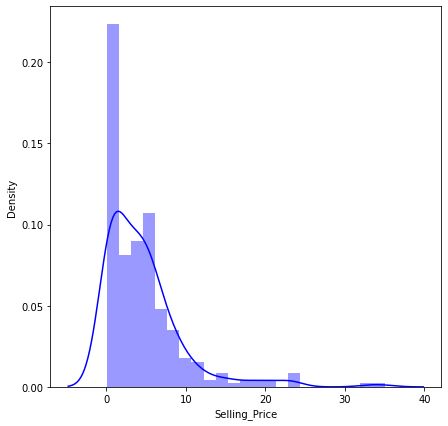

In [21]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(dataset['Selling_Price'],color='blue')

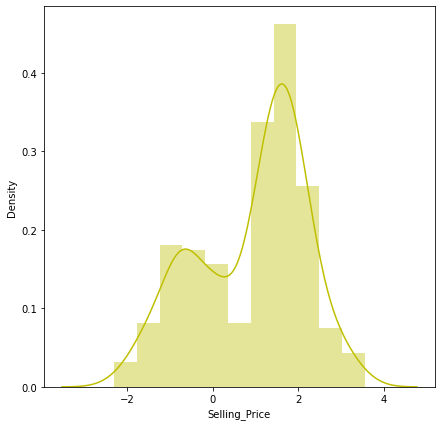

In [26]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(np.log(dataset['Selling_Price']),color="y")

In [27]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

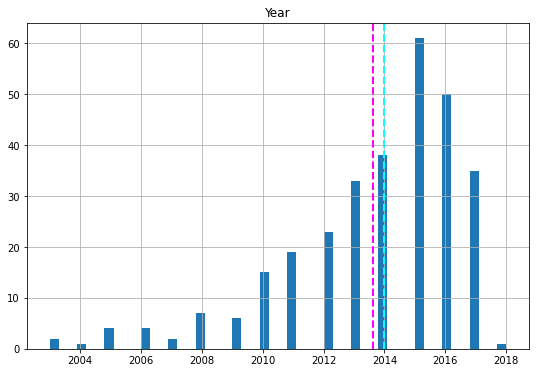

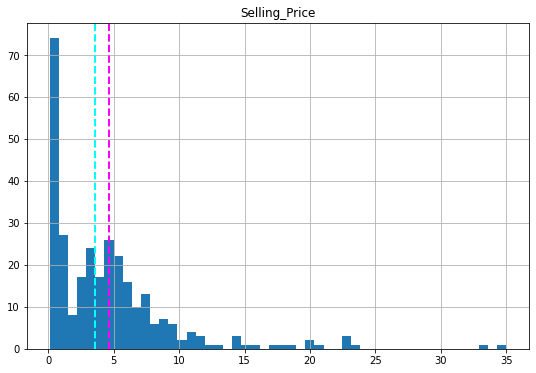

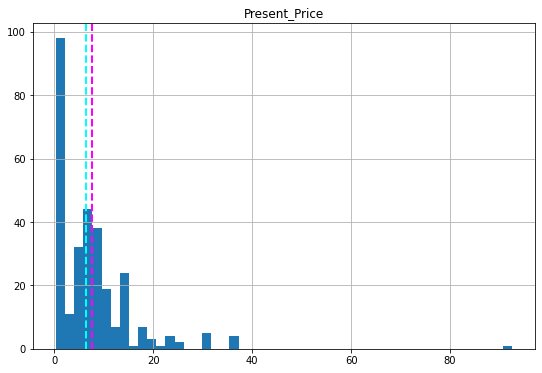

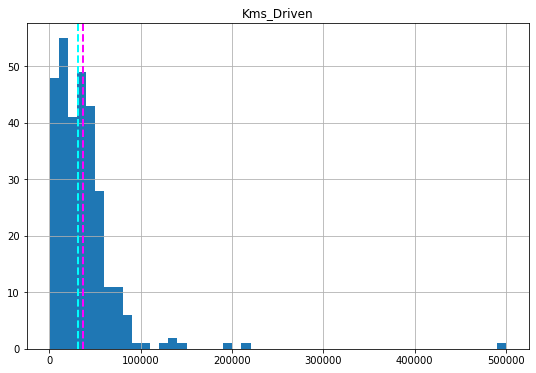

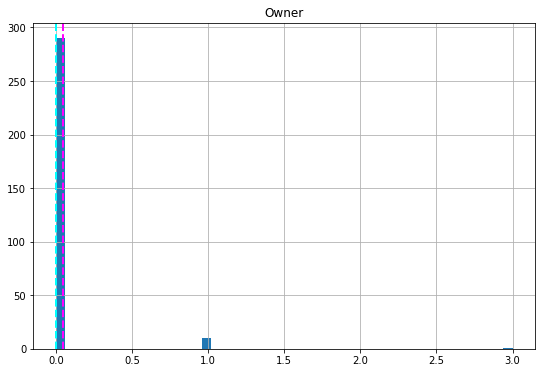

In [28]:
#@title Default title text
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

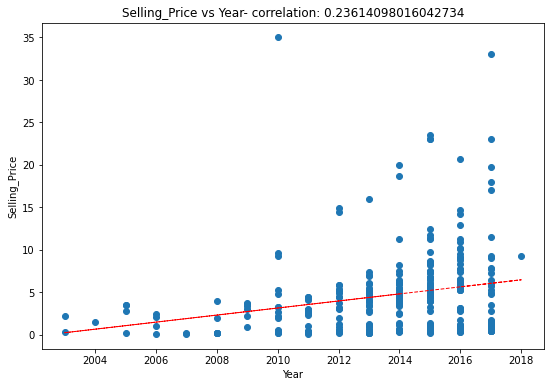

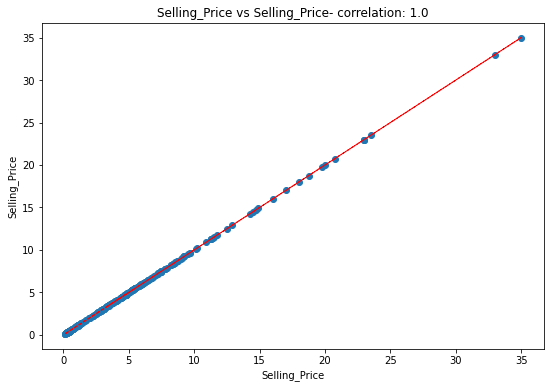

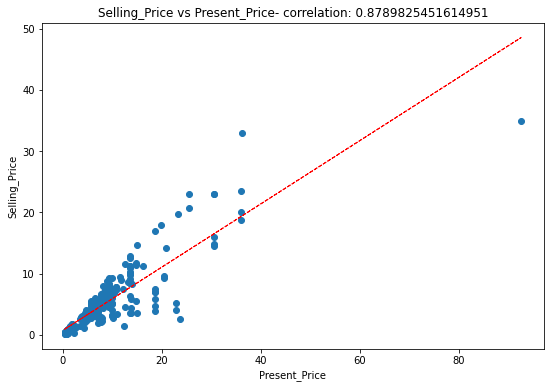

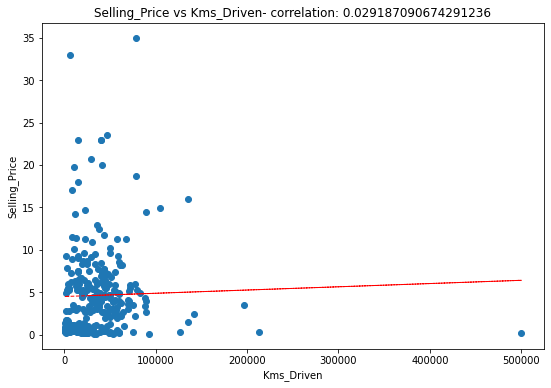

In [34]:
for col in numeric_features[0:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Selling_Price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Selling_Price')
    ax.set_title('Selling_Price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Selling_Price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

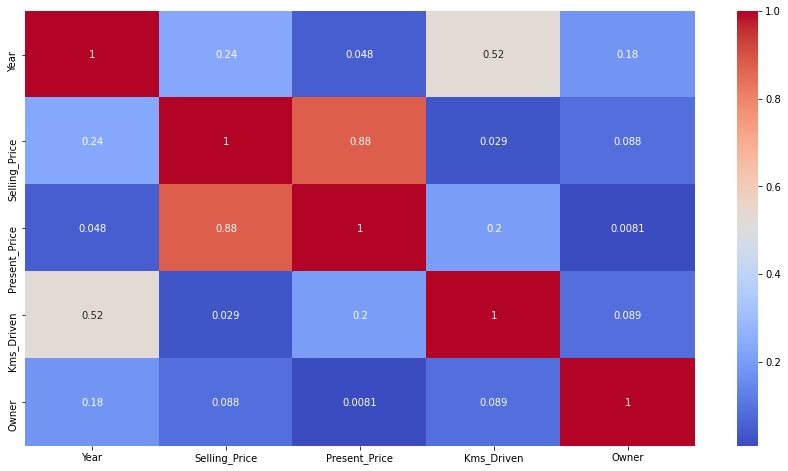

In [30]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [31]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
dataset.describe().columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [35]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Owner','Selling_Price']]])

,variables,VIF
0,Year,2.399526
1,Present_Price,1.858711
2,Kms_Driven,1.985832


In [39]:
dataset['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [40]:
dataset['Car_Name'].value_counts()

city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Hero Hunk              1
KTM 390 Duke           1
Hyosung GT250R         1
Bajaj Discover 100     1
UM Renegade Mojave     1
Name: Car_Name, Length: 98, dtype: int64

In [42]:
dataset['company'] = dataset['Car_Name'].str.split(" ", expand=True)[0]
dataset['company'].value_counts()


city        26
Bajaj       25
corolla     17
Royal       17
Honda       17
Hero        15
verna       14
etios       11
fortuner    11
brio        10
i20          9
innova       9
ciaz         9
grand        8
Yamaha       8
TVS          8
jazz         7
amaze        7
eon          6
sx4          6
ertiga       6
alto         6
i10          5
swift        5
ritz         4
wagon        4
dzire        4
KTM          4
xcent        3
creta        3
Activa       3
elantra      2
baleno       1
ignis        1
Hyosung      1
800          1
Mahindra     1
vitara       1
UM           1
camry        1
omni         1
Suzuki       1
land         1
s            1
Name: company, dtype: int64

In [46]:
categorical_features = dataset.describe(include=['object','category']).columns
categorical_features

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'company'], dtype='object')

In [47]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,company
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift


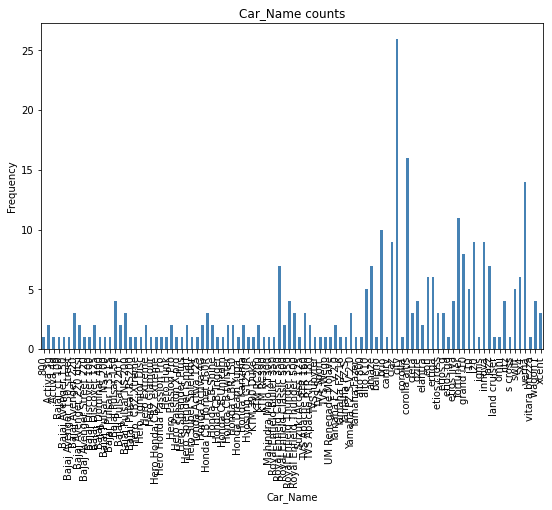

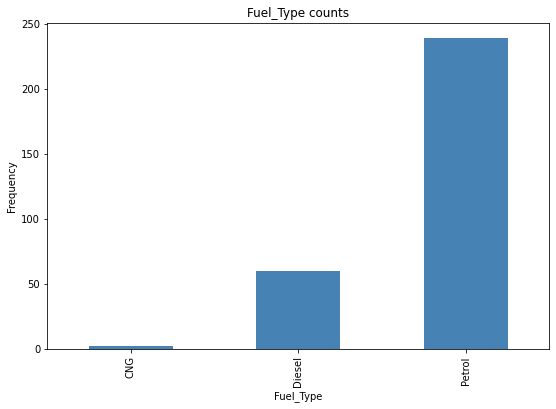

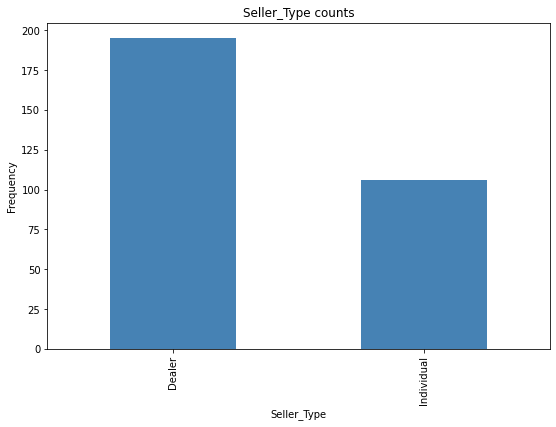

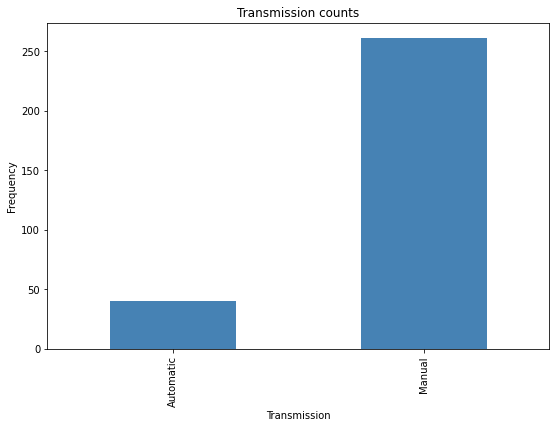

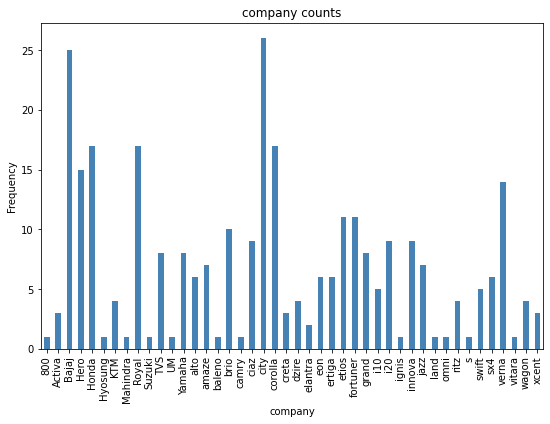

In [48]:

for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

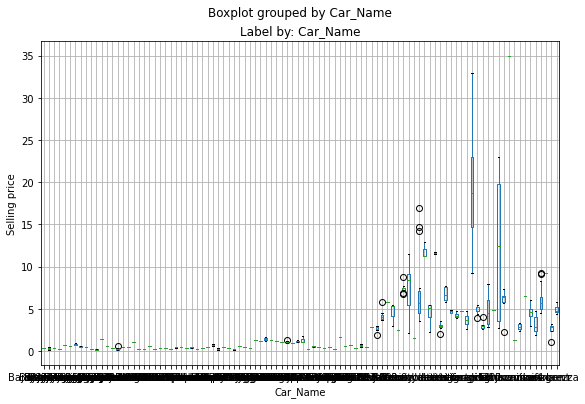

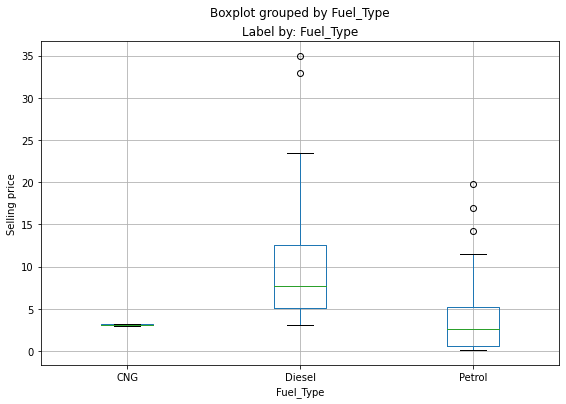

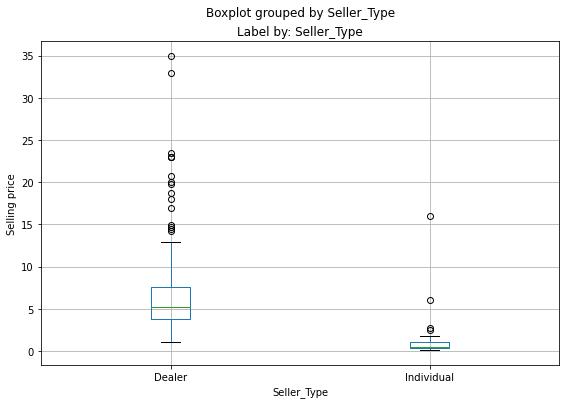

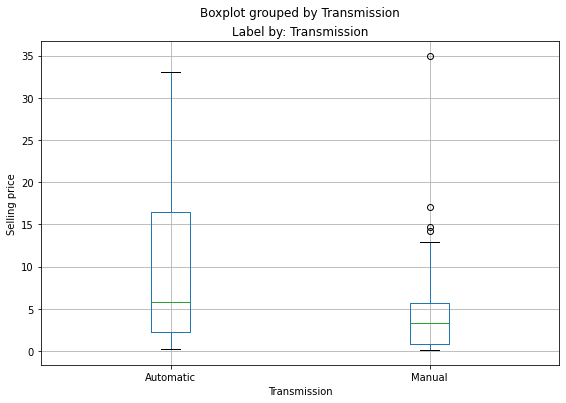

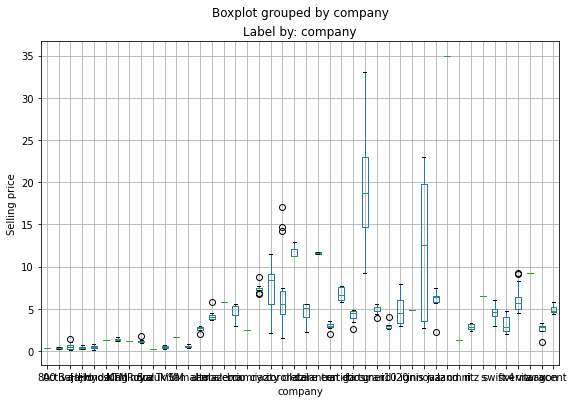

In [50]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Selling_Price', by = col, ax = ax)
    ax.set_title('Label by: ' + col)
    ax.set_ylabel("Selling price")
plt.show()

<Figure size 1080x720 with 0 Axes>

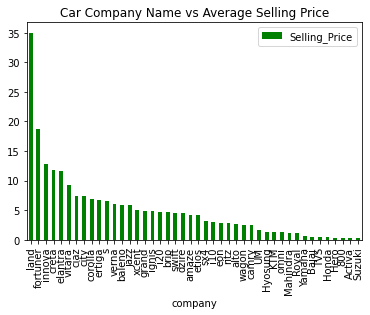

In [57]:
plt.figure(figsize=(15,10))

df_autox = pd.DataFrame(dataset.groupby(['company'])['Selling_Price'].mean().sort_values(ascending = False))
df_autox.plot.bar(color='g')
plt.title('Car Company Name vs Average Selling Price')
plt.show()

In [51]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'company'],
      dtype='object')

In [58]:
df_autox.rename(columns={'Selling_Price':'Average_Selling_Price'},inplace=True)

In [59]:
dataset = dataset.merge(df_autox,on = 'company',how = 'left')

In [60]:
dataset['Company_Category'] = dataset['Average_Selling_Price'].apply(lambda x : 0 if x < 4.0 else (1 if 4.0 <= x < 7.0 else 2))

In [61]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,company,Average_Selling_Price,Company_Category
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz,2.862500,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4,3.158333,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz,7.472222,2
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon,2.512500,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift,4.540000,1


In [62]:
dataset['Company_Category'].value_counts()

0    135
1    104
2     62
Name: Company_Category, dtype: int64

In [64]:
dataset_cpy=dataset.copy()

In [65]:
dataset_cpy['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [67]:
dataset_cpy['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [68]:
dataset_cpy['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [78]:
# One hot encoding
dataset_cpy = pd.get_dummies(dataset_cpy, columns=["Fuel_Type"], prefix=["Fuel_Type"])

In [80]:
dataset_cpy = pd.get_dummies(dataset_cpy, columns=["Seller_Type",'Transmission'],prefix=["Seller_Type","Transmission"])

In [81]:
dataset_cpy.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,company,Average_Selling_Price,Company_Category,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,ritz,2.862500,0,0,0,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,sx4,3.158333,0,0,1,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,ciaz,7.472222,2,0,0,1,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,wagon,2.512500,0,0,0,1,1,0,0,1
4,swift,2014,4.60,6.87,42450,0,swift,4.540000,1,0,1,0,1,0,0,1


In [82]:
dataset_cpy.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Owner', 'company', 'Average_Selling_Price', 'Company_Category',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [86]:
#features = numerical_features.copy()
features=dataset_cpy.describe().columns
features

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Average_Selling_Price', 'Company_Category', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Dealer',
       'Seller_Type_Individual', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

In [87]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
x = dataset_cpy[features].apply(zscore)

In [88]:
y = np.log10(dataset_cpy['Selling_Price'])

In [89]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(x_train.shape)
print(x_test.shape)

(240, 14)
(61, 14)


In [90]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [91]:
reg.score(x_train, y_train)

0.909221416234707

In [92]:
reg.coef_

array([ 0.10632387,  0.08833943,  0.05239629, -0.00883596,  0.01862288,
        0.06872652,  0.08644122,  0.00345836,  0.00524884, -0.00587979,
        0.1464146 , -0.1464146 , -0.0086203 ,  0.0086203 ])

In [94]:
y_pred = reg.predict(x_test)
y_pred

array([ 0.80037064, -0.35989314,  0.68865926,  1.01049037,  1.2798919 ,
        0.7328035 ,  0.5536275 , -0.17867043,  0.55340988,  0.6026683 ,
        0.35011719, -0.16890419,  0.76336148,  0.8554227 ,  0.85126222,
        1.30411251,  0.7447714 ,  0.63483492, -0.36697572, -0.09211853,
        0.34486732,  0.80555584,  0.59930831,  1.09459006, -0.48736721,
       -0.13189154, -0.37945116, -0.24886771, -0.32266321,  0.46350779,
        0.56894536,  0.88327543, -0.24999007,  0.9849067 ,  0.59402128,
       -0.15057067,  0.77656121,  0.70596215, -0.40351521,  0.92303438,
        1.10414889,  1.38622523,  0.69760585,  0.76168225,  0.6864354 ,
        1.14797368, -0.29703636, -0.15370067,  0.78339805,  0.77743127,
        0.83134132,  0.53657314,  0.63922821,  1.48279686, -0.15181691,
       -0.19239248, -0.28765886,  0.33862532,  0.58380795, -0.13232418,
        0.55825597])

In [95]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1.7881439606904876
RMSE : 1.3372150016696969


In [96]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2 : 0.9292589538040187
Adjusted R2 :  0.9077290701791548


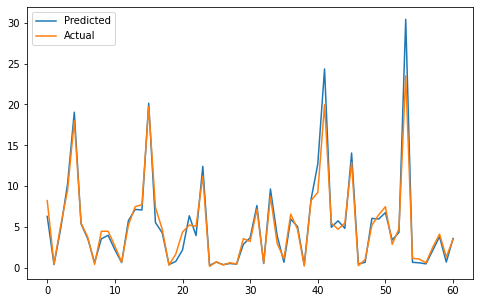

In [100]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [101]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
lasso.score(x_train, y_train)

0.9092211700971777

In [103]:
lasso.coef_

array([ 1.06217639e-01,  8.83974351e-02,  5.23953327e-02, -8.76907545e-03,
        1.84481956e-02,  6.85537799e-02,  8.64264391e-02,  4.28616052e-03,
        9.67558166e-03, -1.35477456e-03,  2.92805074e-01, -3.26265473e-15,
       -1.70943258e-02,  0.00000000e+00])

In [104]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [105]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.048744241138890705


In [106]:
y_pred_lasso = lasso_regressor.predict(x_test)

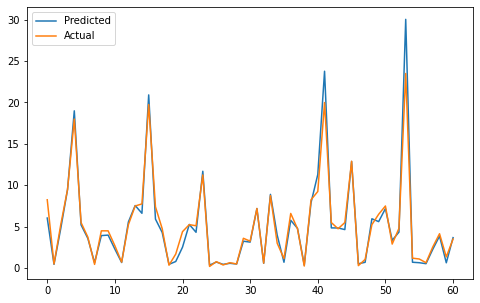

In [107]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [108]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 1.3918921831064268
RMSE : 1.1797848037275387
R2 : 0.944935133082386
Adjusted R2 :  0.9281762605422426


In [109]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [110]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 55}

Using  {'alpha': 55}  the negative mean squared error is:  -0.038685574567003396


In [111]:
y_pred_ridge = ridge_regressor.predict(x_test)

In [112]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 1.4440222321958522
RMSE : 1.2016747614042047
R2 : 0.9428728079609736
Adjusted R2 :  0.9254862712534438


In [113]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [114]:
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [115]:
elasticnet.score(x_train, y_train)

0.8854994495790457

In [119]:
y_pred_en = elasticnet.predict(x_test)

In [120]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 1.0908018011251246
RMSE : 1.0444145733975205
R2 : 0.9568466173303769
Adjusted R2 :  0.9437129791265786


In [121]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [122]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1, 'l1_ratio': 0.4}

Using  {'alpha': 0.1, 'l1_ratio': 0.4}  the negative mean squared error is:  -0.037657504331444984


In [123]:
y_pred_elastic = elastic_regressor.predict(x_test)


In [124]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.8733489798512498
RMSE : 0.9345314226130922
R2 : 0.9654493028038897
Adjusted R2 :  0.9549338732224649


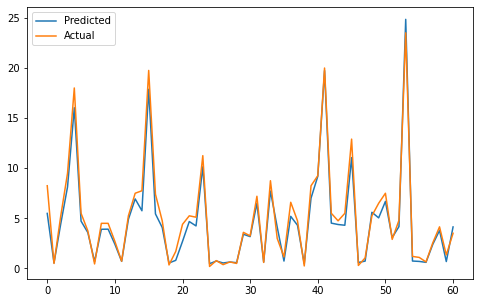

In [125]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **Conclusion**

**From above model we can conclude that below point:**

* Automatic vehicles fetch higher resale price compared to manual ones.

* Age of the vehicle seems to show negative correlation with selling price.

* Past_Owners and Kms_Driven are showing very less correlation with selling price.

* Resale value of cars with Fuel type CNG is higher as comapre to other.

* Average price of a car directly influences Selling Price prediction.Both are highly correlated and here directly proportional to each other.